In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [96]:
df = pd.read_csv('data.csv')

In [97]:
cols = df.columns[0:12]
df = df[cols]

In [99]:
df.head()
df = df.drop('id',axis=1)

In [100]:
def parse_diagnosis(diagnosis):
    if diagnosis == 'B':
        return 'Benign Tumor'
    else:
        return 'Malignant Tumor'
    
def parse_diag_binary(diagnosis):
    if diagnosis == 'B':
        return 0
    else:
        return 1

In [101]:
df['diagnosis2'] = df['diagnosis'].apply(parse_diagnosis)
df['diagnosis'] = df['diagnosis'].apply(parse_diag_binary)

In [102]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis2
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,Malignant Tumor
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,Malignant Tumor
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,Malignant Tumor
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,Malignant Tumor
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,Malignant Tumor


Text(0.5, 1.0, 'Benign vs Malignant')

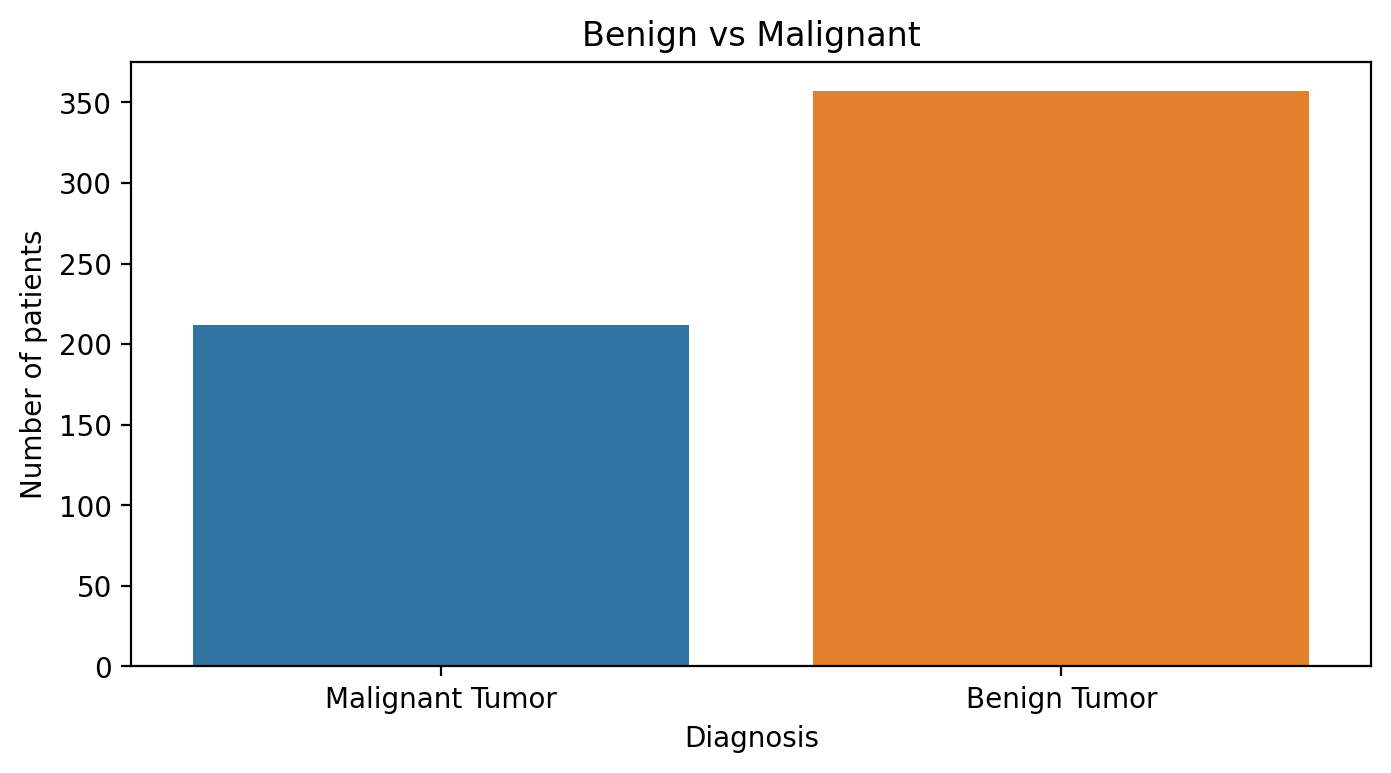

In [103]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='diagnosis2',data=df)
plt.ylabel('Number of patients')
plt.xlabel('Diagnosis')
plt.title("Benign vs Malignant")
# plt.savefig('BvsM.jpg')

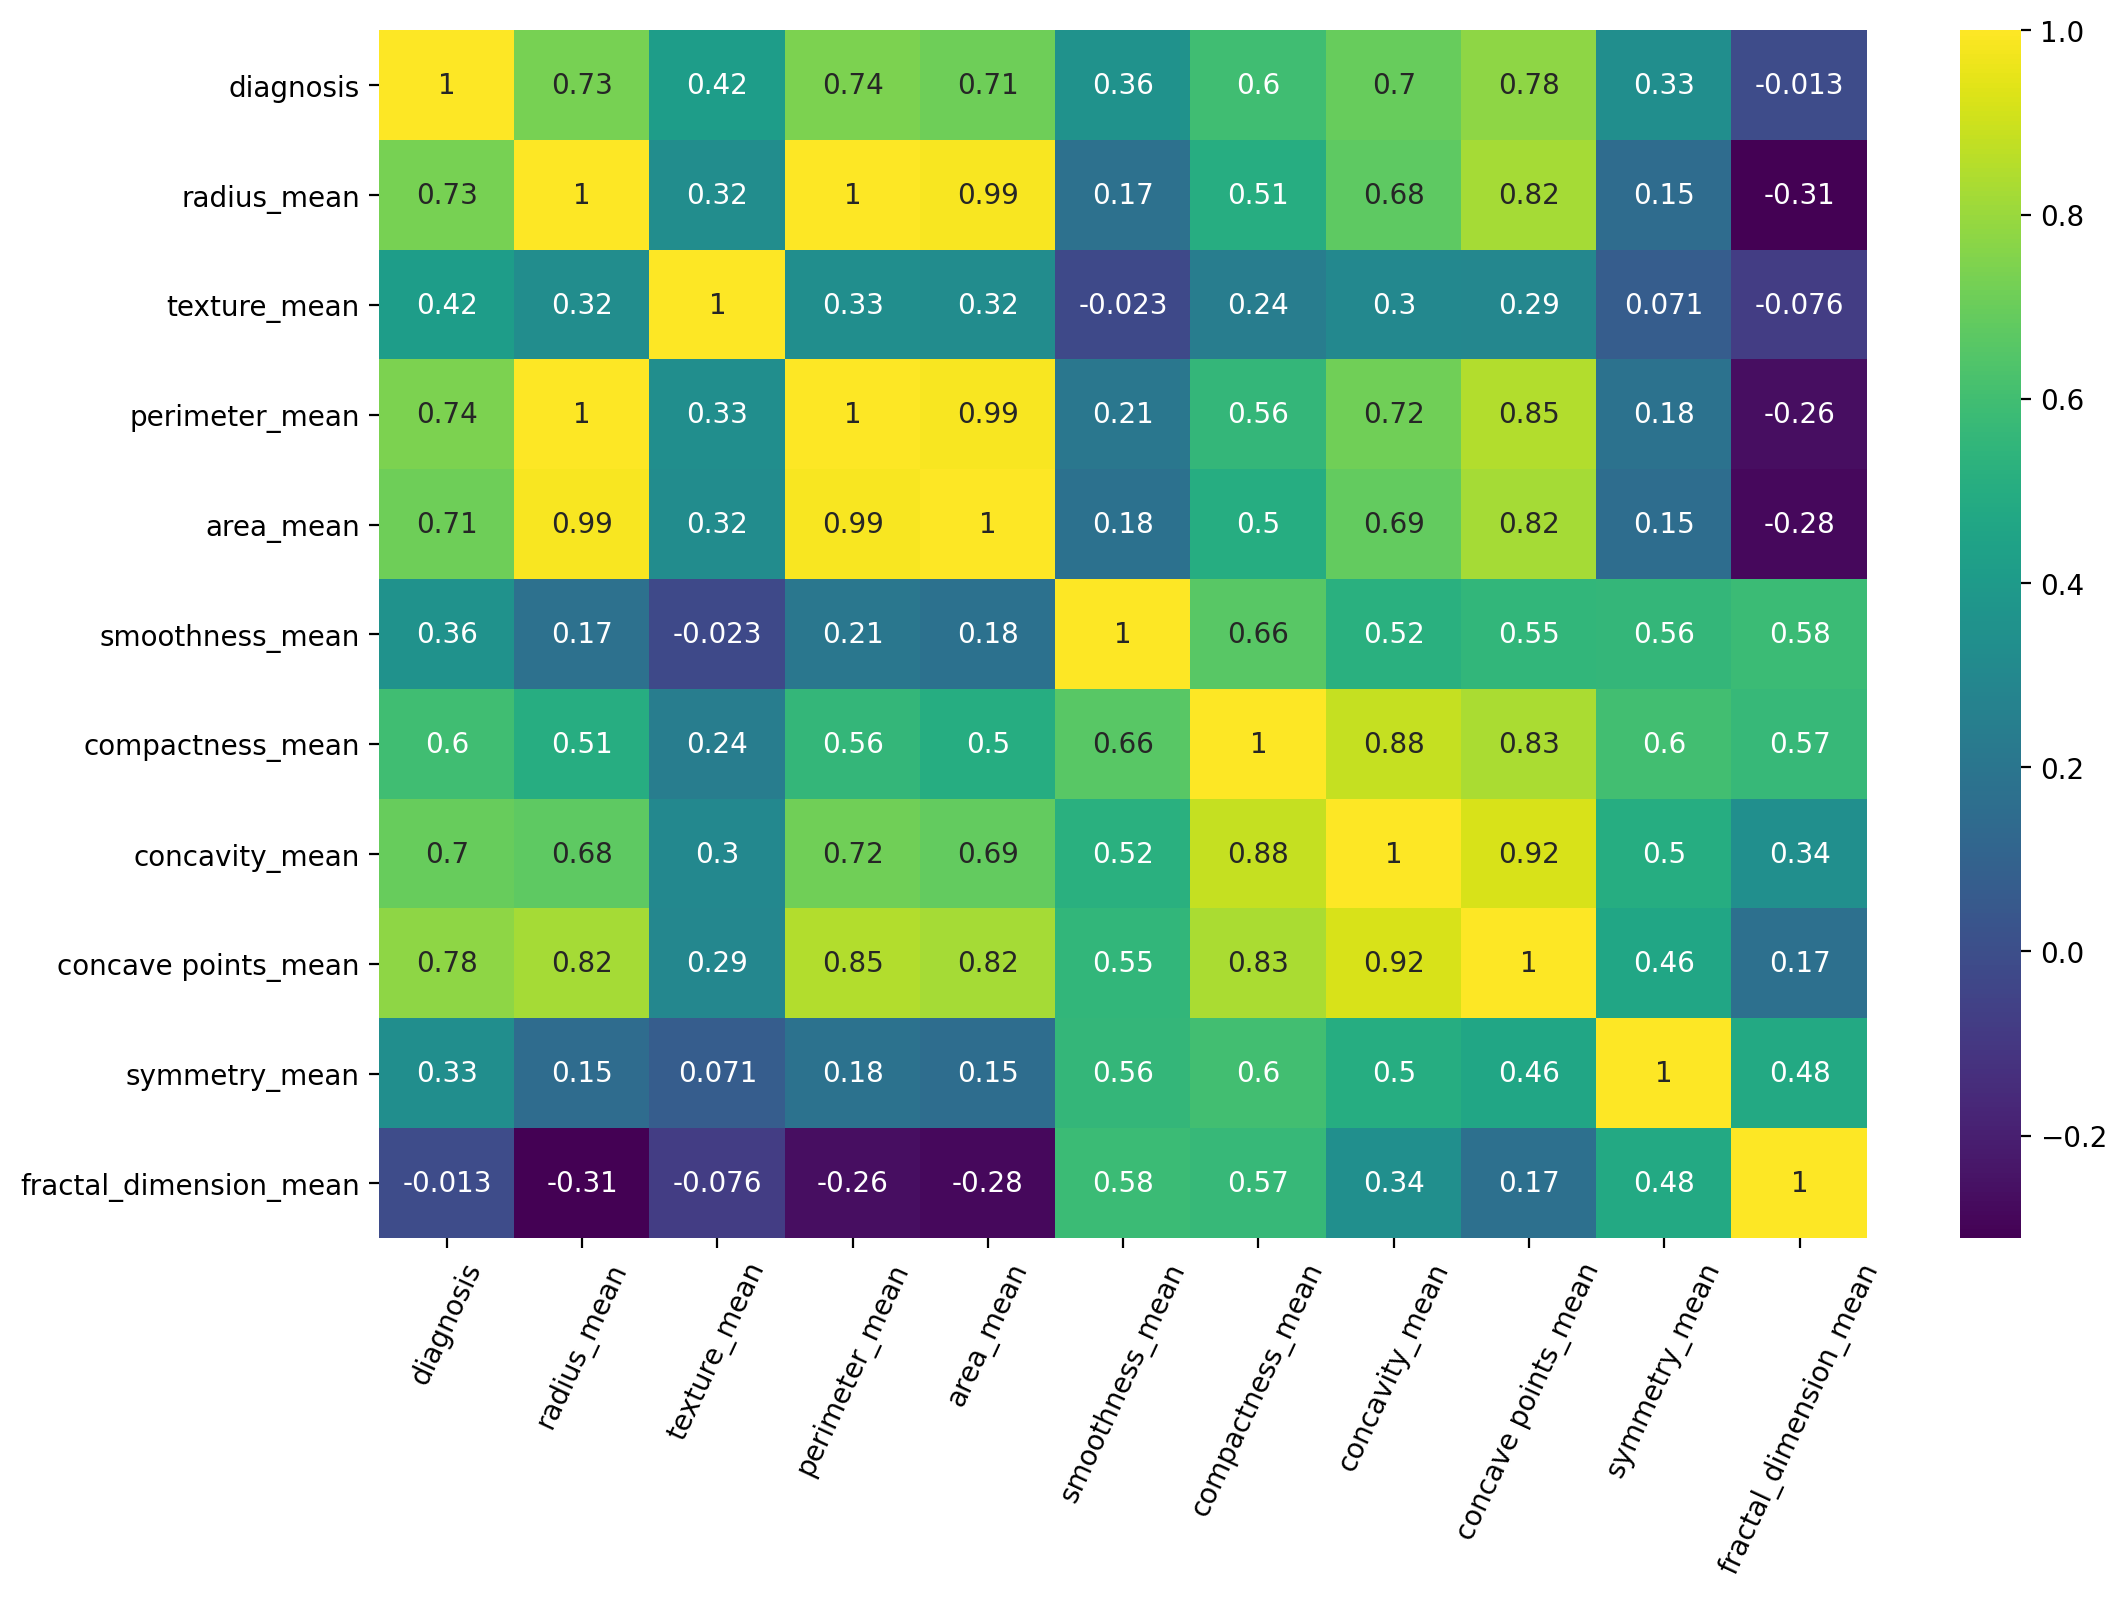

In [142]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.xticks(rotation=65)
plt.savefig('heatmap.jpg', bbox_inches='tight')

In [119]:
df.rename(columns={'diagnosis2':'Tumor Type'},inplace=True)

<Figure size 2500x2000 with 0 Axes>

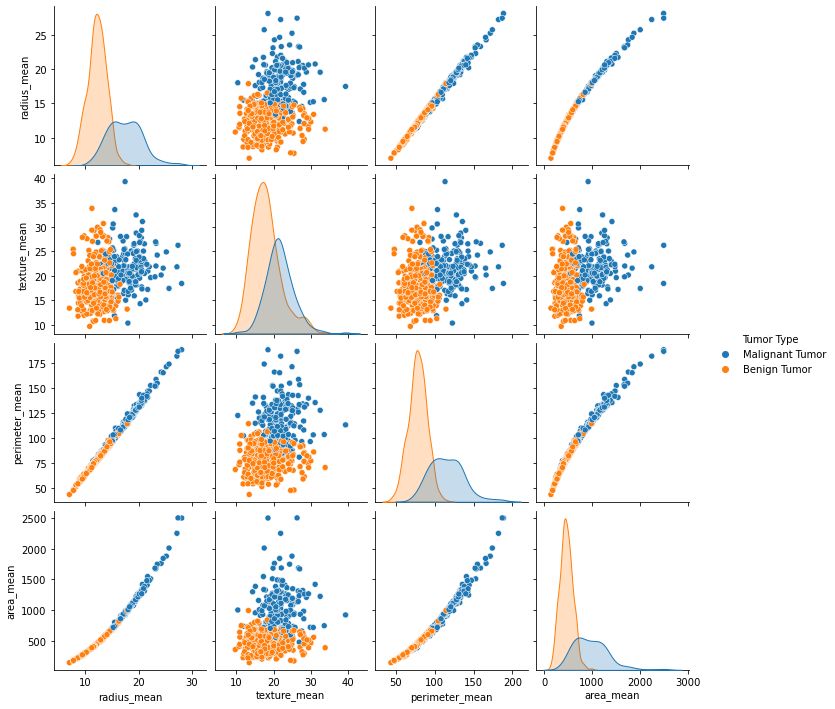

In [135]:
plt.figure(figsize=(10,8),dpi=250)
# plt.title("Relationship between the radius, texture, perimeter, and area mean of the")
sns.pairplot(df[['radius_mean','texture_mean','perimeter_mean','area_mean','Tumor Type']], hue='Tumor Type')
# plt.savefig('pairplot.jpg')

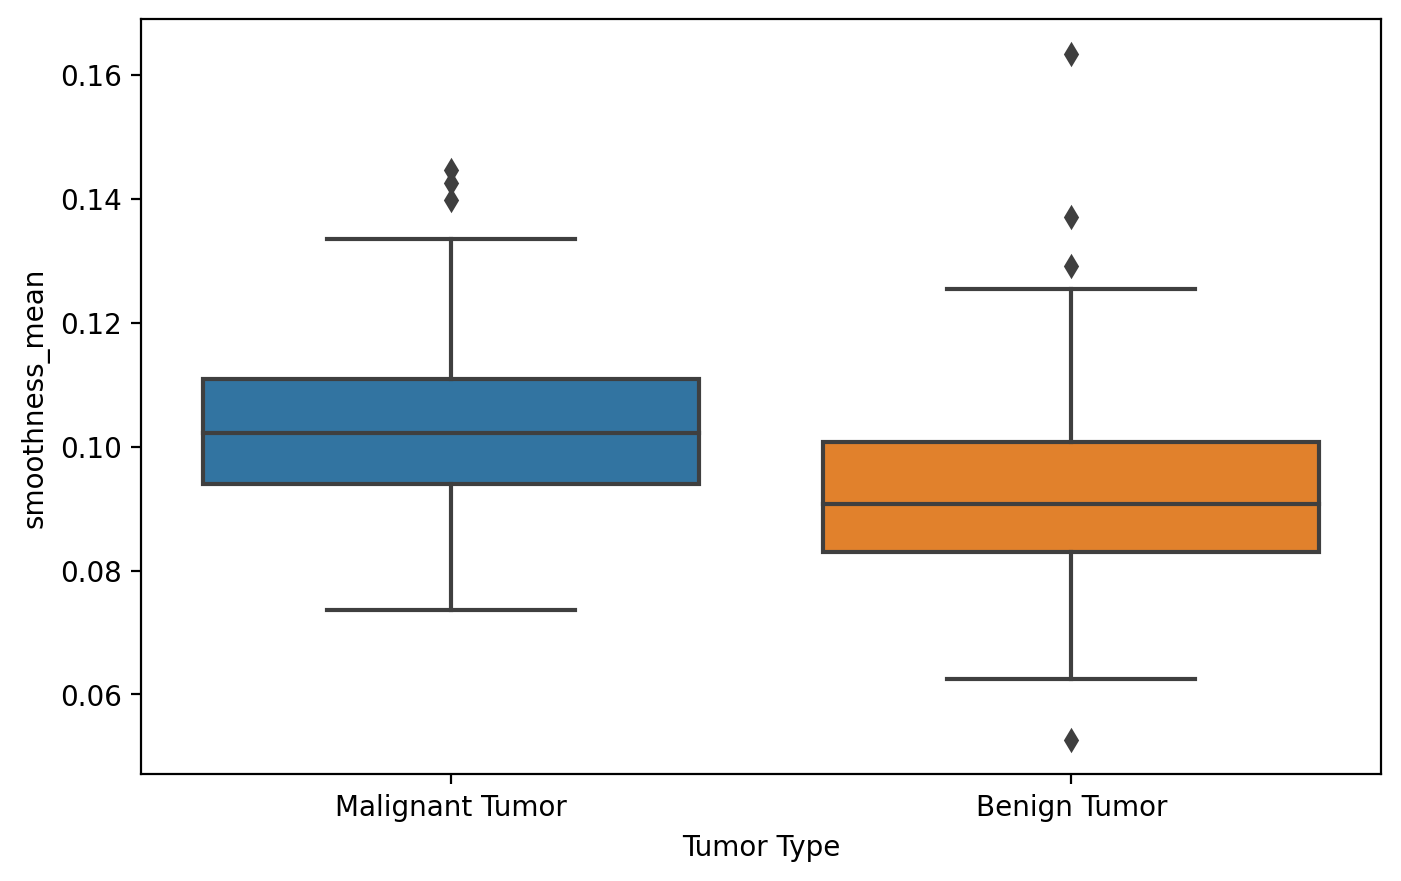

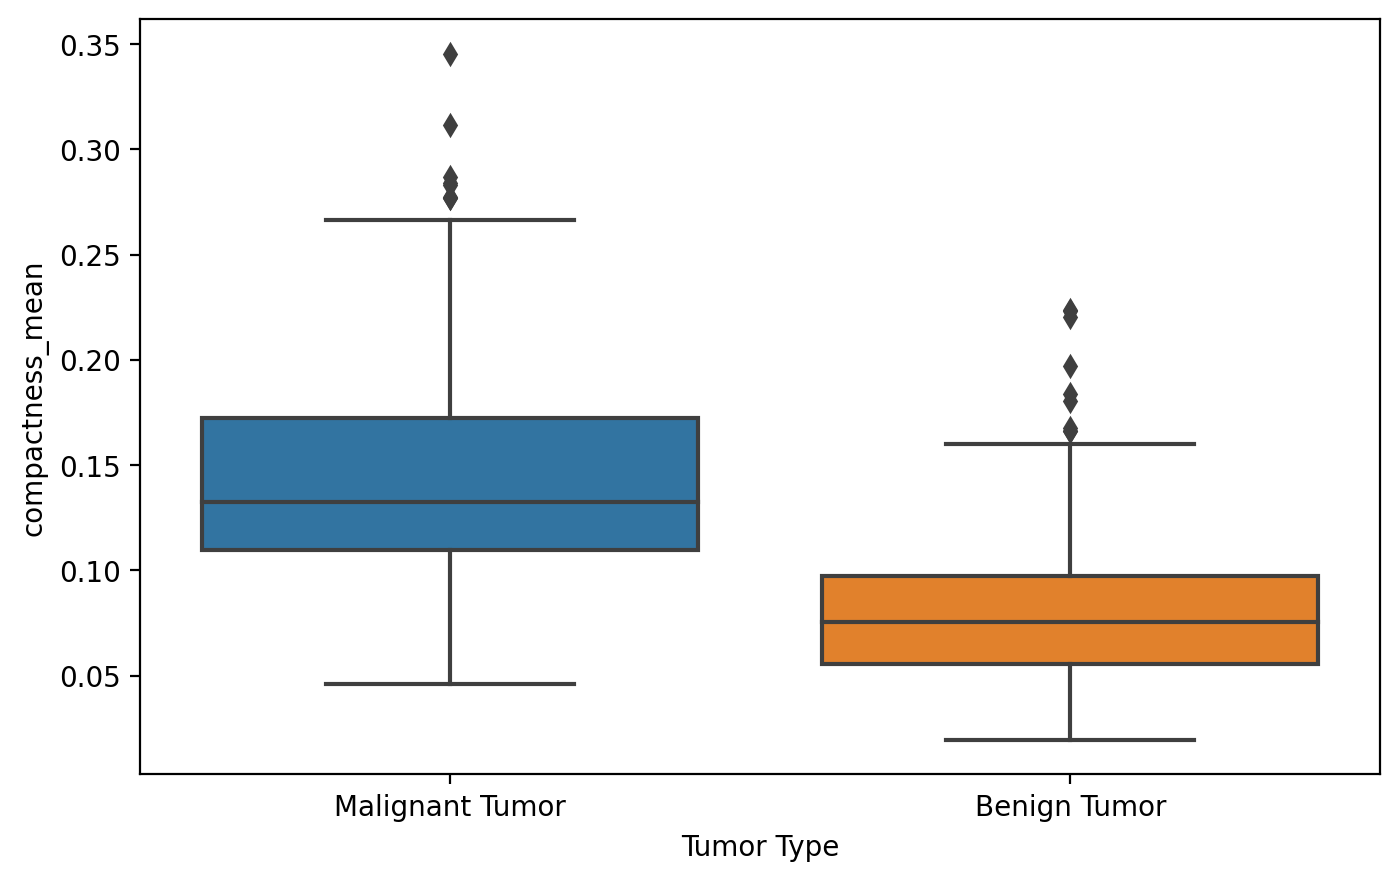

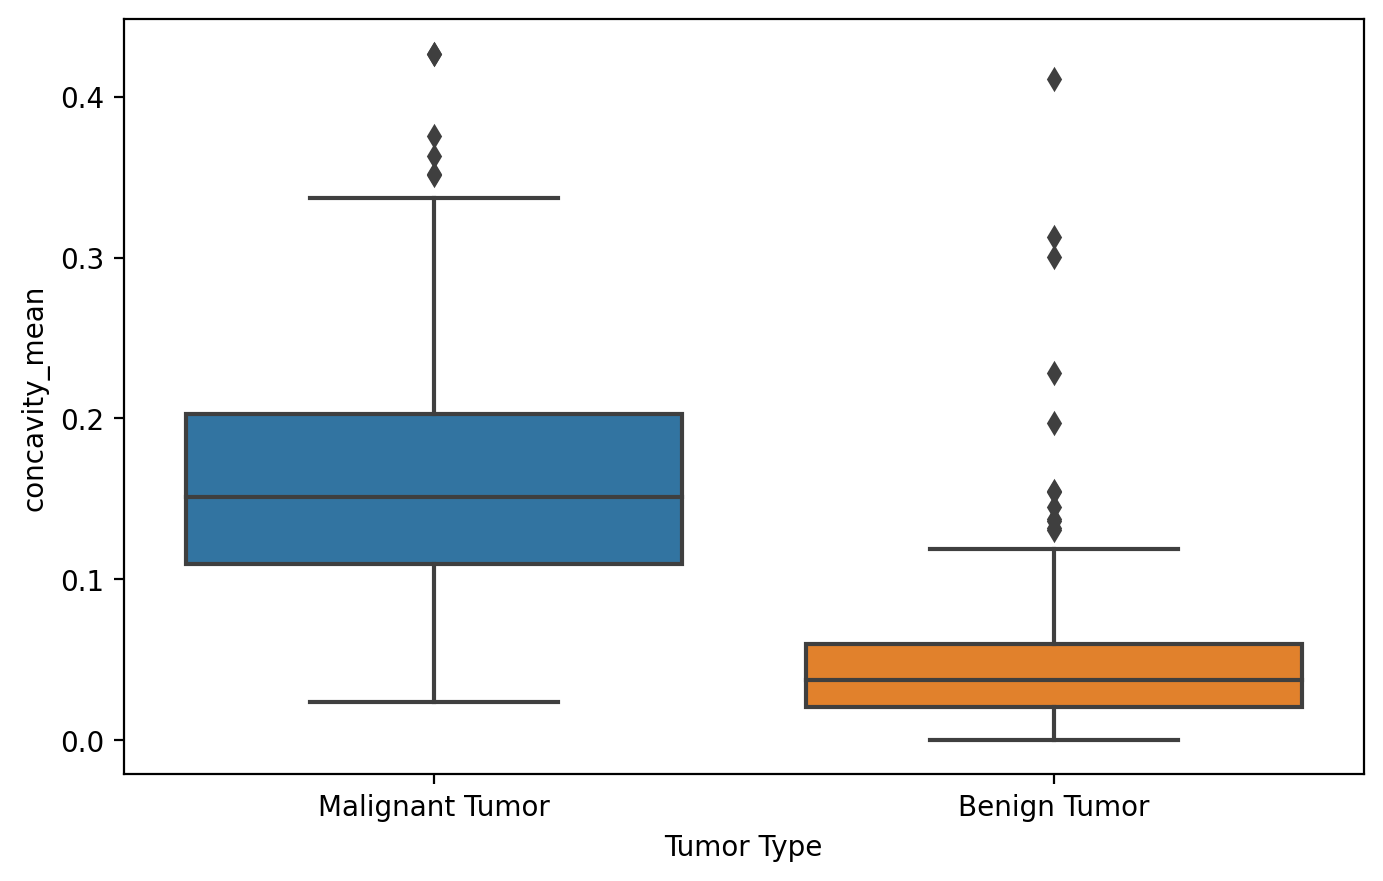

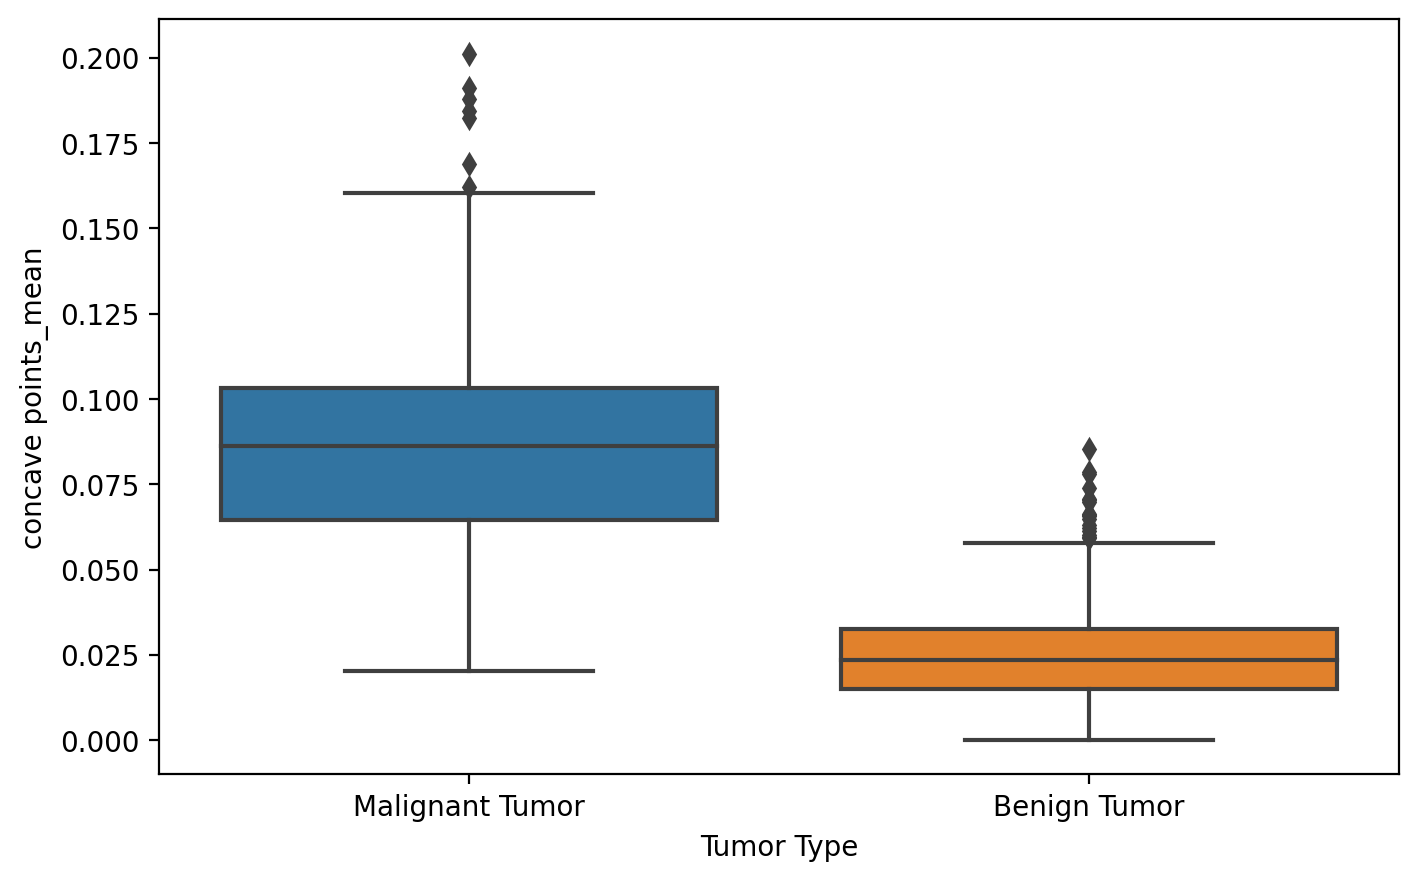

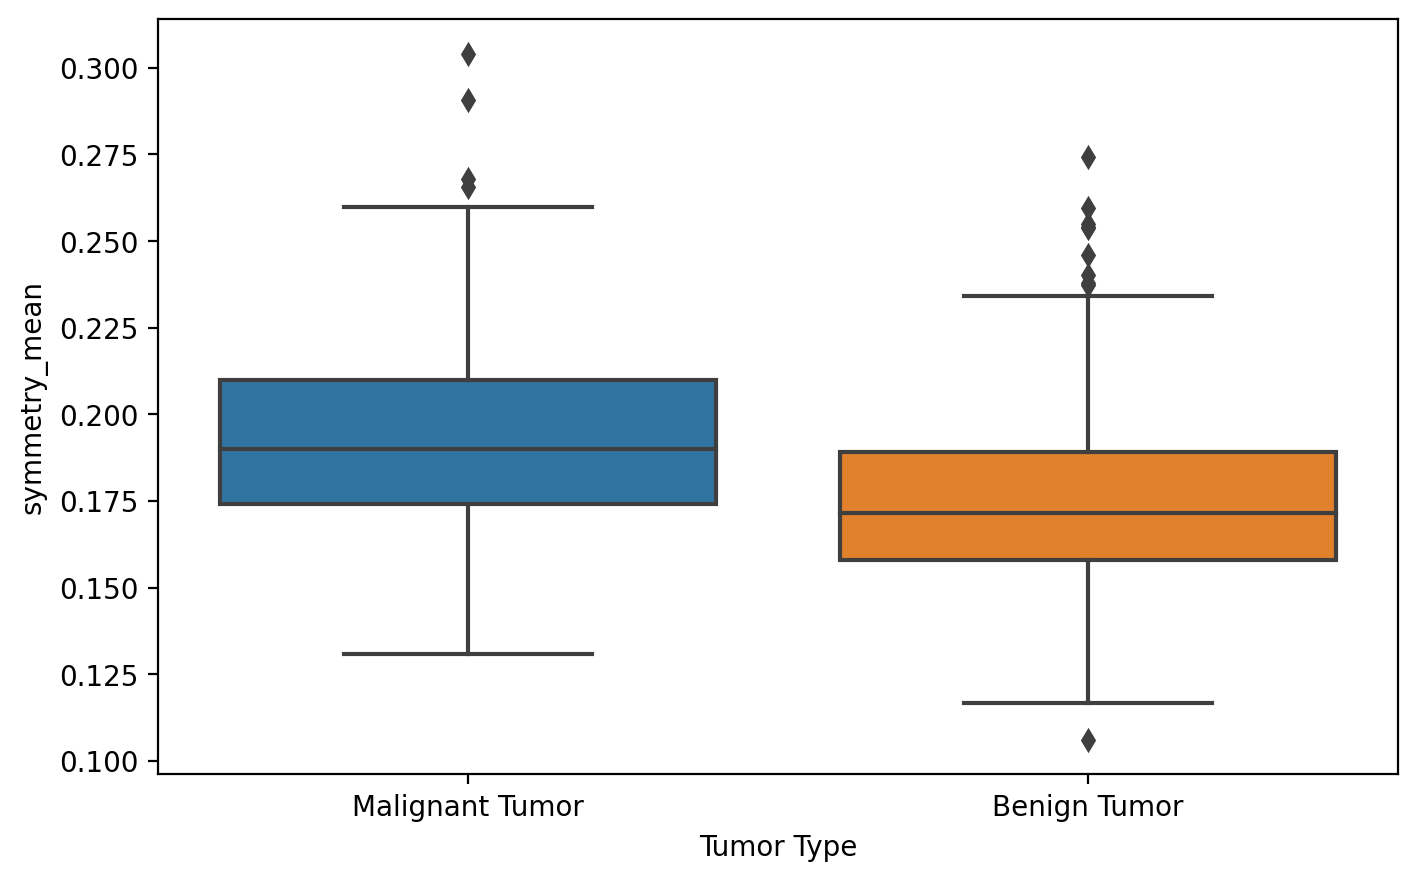

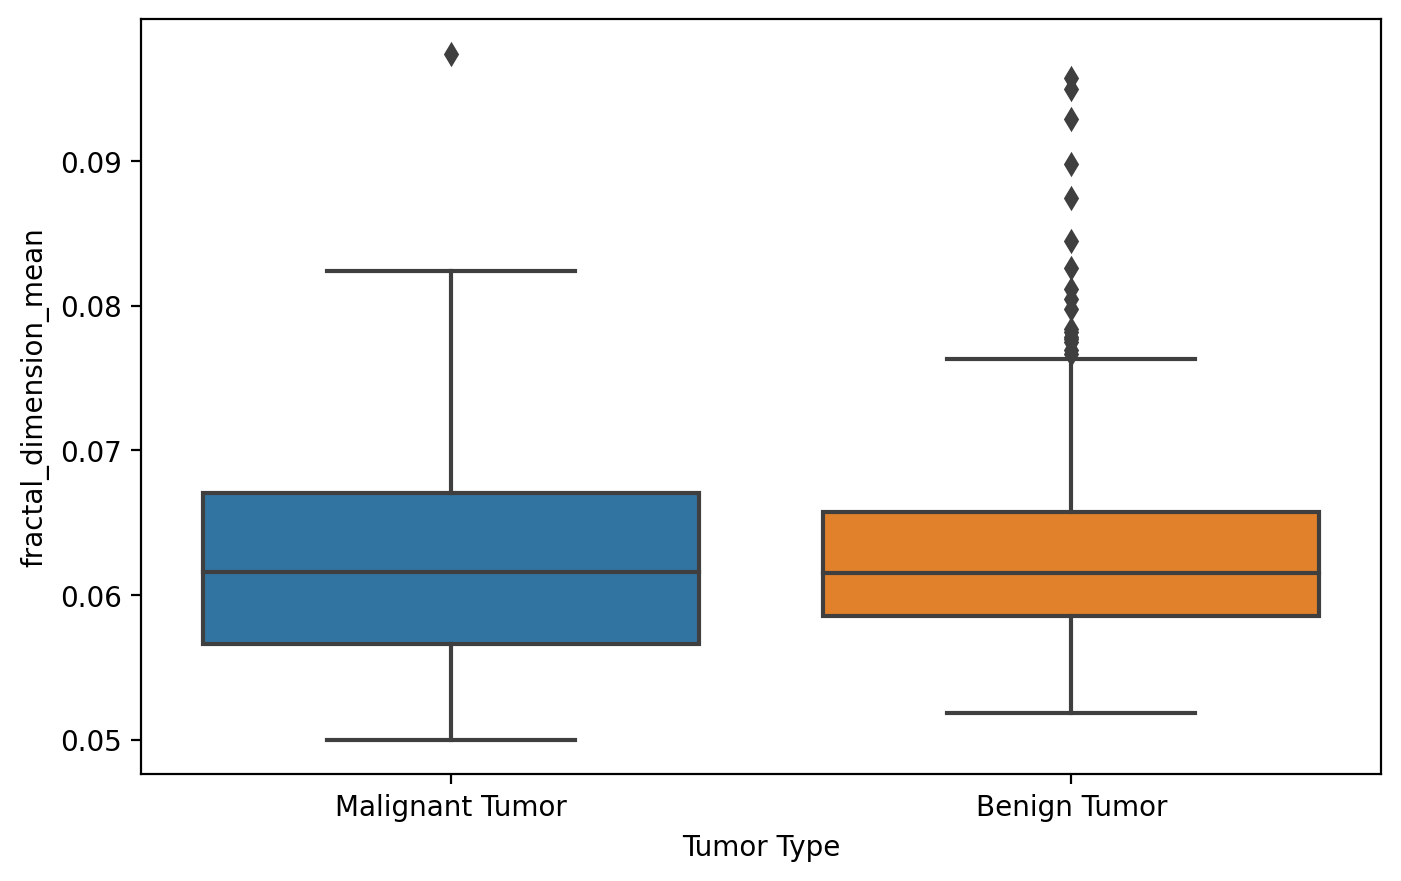

In [133]:
box_cols = df.columns[5:11]
for i, col in enumerate(box_cols):
    plt.figure(figsize=(8,5),dpi=200)
    sns.boxplot(x='Tumor Type', y= col,data=df)
    plt.savefig('boxplot{}.jpg'.format(i))



Index(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')